## Задание 1: 
Сгенерить случайным образом 3 набора с кол-вом точек от 100 до 200 с метками классов.

Разделить датасет на train / test (80/20)

Обучить и протестировать KNN

Построить графики точности классификации (на train / test выборках) при разных k(1...8)

Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений


Рисунок 1:

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# кол-во точек
num_points = np.random.randint(50, 100) # от 50 до 100 на окружность, на выходе от 100 до 200 на рисунок

z1, z2 = [], []

def generate_circle(center, radius, num_points, noise):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = center[0] + radius*np.cos(theta) + np.random.normal(0, noise, num_points)
    y = center[1] + radius*np.sin(theta) + np.random.normal(0, noise, num_points)
    return x, y

# Подбираем шум как на картинке в задании
noise = 1.0

x_inner, y_inner = generate_circle((0, 0), 5, num_points, noise)
x_outer, y_outer = generate_circle((0, 0), 10, num_points, noise)

for j, i in enumerate(range(len(x_inner))):
    z1.append('inner') 

for j, i in enumerate(range(len(x_outer))):
    z2.append('outer') 

tempdf1 = pd.DataFrame(zip(x_inner, y_inner, z1), columns = ['x', 'y', 'cat'])
tempdf2 = pd.DataFrame(zip(x_outer, y_outer, z2), columns = ['x', 'y', 'cat'])
df_1 = pd.concat([tempdf1, tempdf2], sort=False, axis=0)

print('Вывод сета:')
df_1

Вывод сета:


,x,y,cat
0,4.311315,0.583643,inner
1,3.449745,1.993209,inner
2,2.534208,1.046990,inner
3,5.017816,2.461965,inner
4,3.524380,1.731874,inner
...,...,...,...
50,8.127362,-3.964581,outer
51,9.488480,-3.296192,outer
52,9.837477,-2.130759,outer
53,9.366722,-2.640818,outer


визуализация сета:


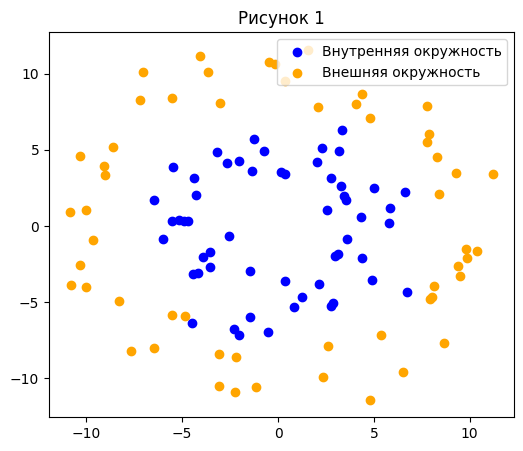

In [411]:
print('визуализация сета:')
plt.figure(figsize=(6, 5))
plt.scatter(x_inner, y_inner, color='blue', label='Внутренняя окружность')
plt.scatter(x_outer, y_outer, color='orange', label='Внешняя окружность')
plt.title('Рисунок 1')
plt.legend()
plt.show()  # похоже на рисунок в задании, ящитаю

In [412]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skm

# Разделяем датасет на train / test (80/20)
x_train, x_test, y_train, y_test = train_test_split(df_1[['x', 'y']], df_1['cat'], test_size=0.2)

k_values = range(1, 9)
train_accuracy = []
test_accuracy = []

for k in k_values:
    # Обучаем и тестируем модель
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Вычисляем точность
    train_accuracy.append(skm.accuracy_score(y_train, knn.predict(x_train)))
    test_accuracy.append(skm.accuracy_score(y_test, knn.predict(x_test)))

визуализация сета:


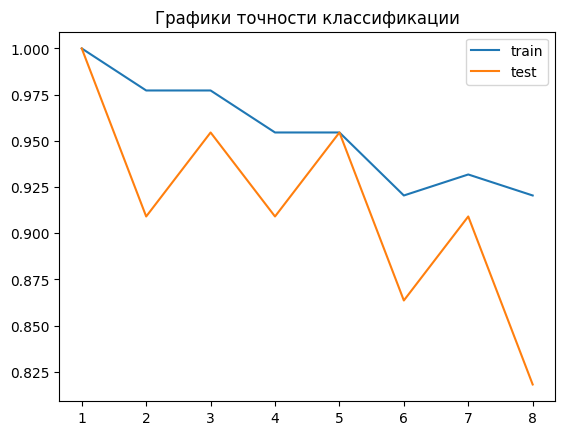

In [413]:
print('визуализация сета:')
plt.plot(k_values, train_accuracy, label='train')
plt.plot(k_values, test_accuracy, label='test')
plt.title('Графики точности классификации')
plt.legend()
plt.show()

In [414]:
print('Вычислим точность, полноту и F1-меру, построим матрицу')
# Вычисление метрик и построение матрицы расхождений

#k_values = range(1, 9)
k = 3

#for k in k_values:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = skm.accuracy_score(y_test, y_pred)

precision = skm.precision_score(y_test, y_pred, pos_label='inner')
recall = skm.recall_score(y_test, y_pred, pos_label='inner')
f1 = skm.f1_score(y_test, y_pred, pos_label='inner')


print(f'[ при k = {k} ] accuracy:', accuracy)
print(f'[ при k = {k} ] precision:', precision)
print(f'[ при k = {k} ] recall:', recall)
print(f'[ при k = {k} ] f1:', f1)

confusion_matrix = skm.confusion_matrix(y_test, y_pred)
print(f'matrix:', confusion_matrix)

Вычислим точность, полноту и F1-меру, построим матрицу
[ при k = 3 ] accuracy: 0.9545454545454546
[ при k = 3 ] precision: 0.9
[ при k = 3 ] recall: 1.0
[ при k = 3 ] f1: 0.9473684210526316
matrix: [[ 9  0]
 [ 1 12]]


Рисунок 2:

In [415]:
num_points = np.random.randint(25, 50) # x4, на выходе от 100 до 200 на рисунок

x1 = np.random.uniform(0, 0.5, num_points)
y1 = np.random.uniform(0.5, 1.0, num_points)

x2 = np.random.uniform(0.5, 1.0, num_points)
y2 = np.random.uniform(0.5, 1.0, num_points)

x3 = np.random.uniform(0.5, 1.0, num_points)
y3 = np.random.uniform(0.0, 0.5, num_points)

x4 = np.random.uniform(0.0, 0.5, num_points)
y4 = np.random.uniform(0.0, 0.5, num_points)

z1, z2 = [], []
X1 = np.concatenate([x1, x3])
X2 = np.concatenate([x2, x4])
Y1 = np.concatenate([y1, y3])
Y2 = np.concatenate([y2, y4])

for i in range(len(X1)):
    z1.append('label_1') 

for i in range(len(X2)):
    z2.append('label_2') 
    
tempdf1 = pd.DataFrame(zip(X1, Y1, z1), columns = ['x', 'y', 'cat'])
tempdf2 = pd.DataFrame(zip(X2, Y2, z2), columns = ['x', 'y', 'cat'])
df_2 = pd.concat([tempdf1, tempdf2], sort=False, axis=0)
print('Вывод сета:')
df_2

Вывод сета:


,x,y,cat
0,0.247306,0.640316,label_1
1,0.109834,0.764560,label_1
2,0.422481,0.524465,label_1
3,0.374173,0.980032,label_1
4,0.085348,0.560144,label_1
...,...,...,...
53,0.198577,0.428295,label_2
54,0.280042,0.459966,label_2
55,0.019945,0.241057,label_2
56,0.486833,0.298489,label_2


Визуализация сета:


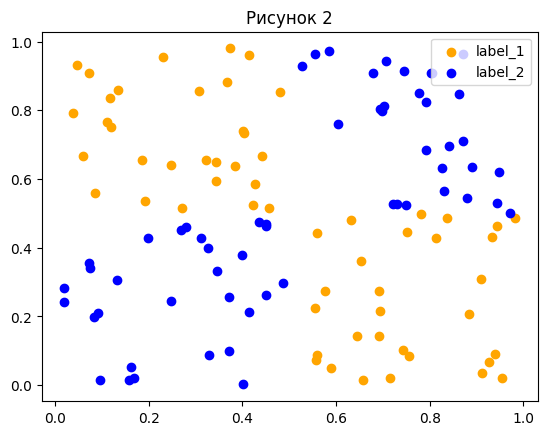

In [416]:
print('Визуализация сета:')
plt.scatter(X1, Y1, color='orange', label='label_1')
plt.scatter(X2, Y2, color='blue', label='label_2')
plt.title('Рисунок 2')
plt.legend()
plt.show()

In [417]:
# Разделяем датасет на train / test (80/20)
x_train, x_test, y_train, y_test = train_test_split(df_2[['x', 'y']], df_2['cat'], test_size=0.2)

k_values = range(1, 9)
train_accuracy = []
test_accuracy = []

for k in k_values:
    # Обучаем и тестируем модель
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Вычисляем точность
    train_accuracy.append(skm.accuracy_score(y_train, knn.predict(x_train)))
    test_accuracy.append(skm.accuracy_score(y_test, knn.predict(x_test)))

визуализация сета:


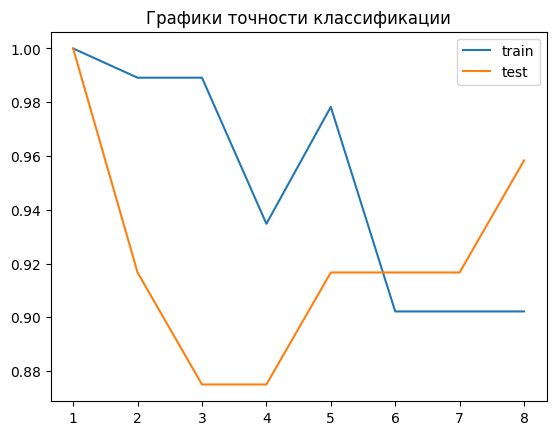

In [418]:
print('визуализация сета:')
plt.plot(k_values, train_accuracy, label='train')
plt.plot(k_values, test_accuracy, label='test')
plt.title('Графики точности классификации')
plt.legend()
plt.show()

In [419]:
print('Вычислим точность, полноту и F1-меру, построим матрицу')
# Вычисление метрик и построение матрицы расхождений

#k_values = range(1, 9)
k = 3
#for k in k_values:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = skm.accuracy_score(y_test, y_pred)

precision = skm.precision_score(y_test, y_pred, pos_label='label_1')
recall = skm.recall_score(y_test, y_pred, pos_label='label_1')
f1 = skm.f1_score(y_test, y_pred, pos_label='label_1')


print(f'[ при k = {k} ] accuracy:', accuracy)
print(f'[ при k = {k} ] precision:', precision)
print(f'[ при k = {k} ] recall:', recall)
print(f'[ при k = {k} ] f1:', f1)

confusion_matrix = skm.confusion_matrix(y_test, y_pred)
print(f'matrix:', confusion_matrix)

Вычислим точность, полноту и F1-меру, построим матрицу
[ при k = 3 ] accuracy: 0.875
[ при k = 3 ] precision: 0.9285714285714286
[ при k = 3 ] recall: 0.8666666666666667
[ при k = 3 ] f1: 0.896551724137931
matrix: [[13  2]
 [ 1  8]]


In [420]:
# Параметры первой полуокружности
radius1 = 1.0
center1 = (0, 0)
start_angle1 = 0
end_angle1 = 180

# Параметры второй полуокружности
radius2 = 1.0
center2 = (1, 0.5) 
start_angle2 = 180
end_angle2 = 360

num_points = np.random.randint(50, 100) # от 50 до 100 точек для каждой метки, на выходе от 100 до 200 на рисунок

# Генерируем точки на первой полуокружности
theta1 = np.linspace(np.radians(start_angle1), np.radians(end_angle1), num_points)
x1 = center1[0] + radius1 * np.cos(theta1)
y1 = center1[1] + radius1 * np.sin(theta1)

# Генерируем точки на второй полуокружности
theta2 = np.linspace(np.radians(start_angle2), np.radians(end_angle2), num_points)
x2 = center2[0] + radius2 * np.cos(theta2)
y2 = center2[1] + radius2 * np.sin(theta2)

z1, z2 = [], []
for i in range(len(x1)):
    z1.append('label_1') 

for i in range(len(x2)):
    z2.append('label_2') 

tempdf1 = pd.DataFrame(zip(x1, y1, z1), columns = ['x', 'y', 'cat'])
tempdf2 = pd.DataFrame(zip(x2, y2, z2), columns = ['x', 'y', 'cat'])
df_3 = pd.concat([tempdf1, tempdf2], sort=False, axis=0)
df_3

,x,y,cat
0,1.000000,0.000000,label_1
1,0.998717,0.050649,label_1
2,0.994869,0.101168,label_1
3,0.988468,0.151428,label_1
4,0.979530,0.201299,label_1
...,...,...,...
58,1.979530,0.298701,label_2
59,1.988468,0.348572,label_2
60,1.994869,0.398832,label_2
61,1.998717,0.449351,label_2


Визуализация сета:


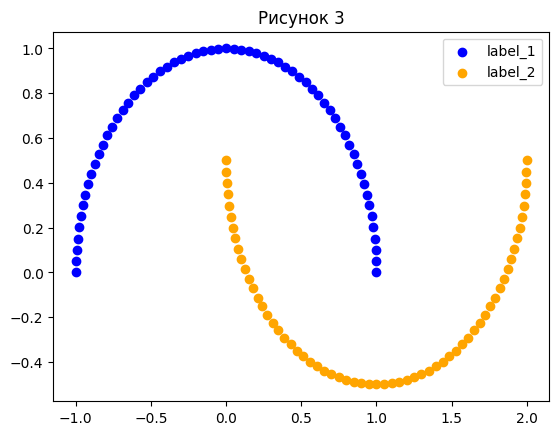

In [421]:
print('Визуализация сета:')
plt.scatter(x1, y1, color='blue', label='label_1')
plt.scatter(x2, y2, color='orange', label='label_2')
plt.title('Рисунок 3')
plt.legend()
plt.show()

In [422]:
# Разделяем датасет на train / test (80/20)
x_train, x_test, y_train, y_test = train_test_split(df_3[['x', 'y']], df_3['cat'], test_size=0.2)

k_values = range(1, 9)
train_accuracy = []
test_accuracy = []

for k in k_values:
    # Обучаем и тестируем модель
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Вычисляем точность
    train_accuracy.append(skm.accuracy_score(y_train, knn.predict(x_train)))
    test_accuracy.append(skm.accuracy_score(y_test, knn.predict(x_test)))

визуализация сета:


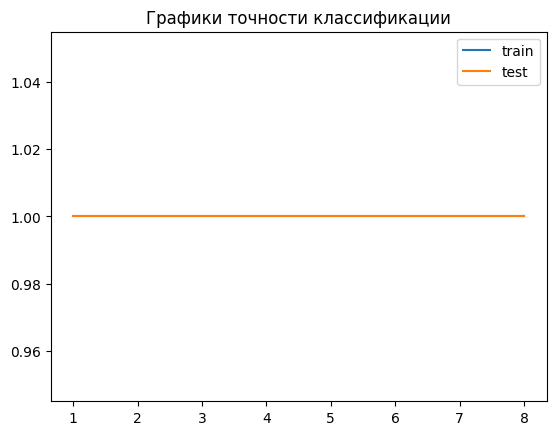

In [423]:
print('визуализация сета:')
plt.plot(k_values, train_accuracy, label='train')
plt.plot(k_values, test_accuracy, label='test')
plt.title('Графики точности классификации')
plt.legend()
plt.show()

In [424]:
print('Вычислим точность, полноту и F1-меру, построим матрицу')
# Вычисление метрик и построение матрицы расхождений

#k_values = range(1, 9)
k = 3
#for k in k_values:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = skm.accuracy_score(y_test, y_pred)

precision = skm.precision_score(y_test, y_pred, pos_label='label_1')
recall = skm.recall_score(y_test, y_pred, pos_label='label_1')
f1 = skm.f1_score(y_test, y_pred, pos_label='label_1')


print(f'[ при k = {k} ] accuracy:', accuracy)
print(f'[ при k = {k} ] precision:', precision)
print(f'[ при k = {k} ] recall:', recall)
print(f'[ при k = {k} ] f1:', f1)

confusion_matrix = skm.confusion_matrix(y_test, y_pred)
print(f'matrix:', confusion_matrix)

Вычислим точность, полноту и F1-меру, построим матрицу
[ при k = 3 ] accuracy: 1.0
[ при k = 3 ] precision: 1.0
[ при k = 3 ] recall: 1.0
[ при k = 3 ] f1: 1.0
matrix: [[15  0]
 [ 0 11]]


## Задание 2: 
Написать код на python (не используя сторонние библиотеки, кроме numpy), чтоб на выводе получилось это:


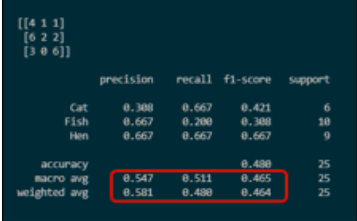

In [425]:
y_true = ['C','C','C','C','C','C','F','F',
          'F','F','F','F','F','F','F','F', 
          'H','H','H','H','H','H','H','H','H']

y_pred = ['C','C','C','C','H','F','C','C',
          'C','C','C','C','H','H','F','F',
          'C','C','C','H','H','H','H','H','H']

labels = ['C', 'F', 'H']

print('Сначала простой вариант, который будем потом переносить только на numpy')
report = skm.classification_report(y_true, y_pred, labels=labels, target_names=labels, output_dict=True)
pd.DataFrame(report)


Сначала простой вариант, который будем потом переносить только на numpy


,C,F,H,accuracy,macro avg,weighted avg
precision,0.307692,0.666667,0.666667,0.48,0.547009,0.580513
recall,0.666667,0.200000,0.666667,0.48,0.511111,0.480000
f1-score,0.421053,0.307692,0.666667,0.48,0.465137,0.464130
support,6.000000,10.000000,9.000000,0.48,25.000000,25.000000


In [426]:
labels = ['C', 'F', 'H']

y_true = ['C','C','C','C','C','C','F','F',
          'F','F','F','F','F','F','F','F', 
          'H','H','H','H','H','H','H','H','H']

y_pred = ['C','C','C','C','H','F','C','C',
          'C','C','C','C','H','H','F','F',
          'C','C','C','H','H','H','H','H','H']

def numpy_only(y_true, y_pred, labels):
    tp = np.zeros(len(labels))
    fp = np.zeros(len(labels))
    fn = np.zeros(len(labels))

    for i in range(len(labels)):
        for true_label, pred_label in zip(y_true, y_pred):
            if pred_label == labels[i]:
                if true_label == labels[i]:
                    tp[i] += 1
                else:
                    fp[i] += 1
            elif true_label == labels[i]:
                fn[i] += 1

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    macroavg_p = np.mean(precision)
    macroavg_r = np.mean(recall)
    macroavg_f = np.mean(f1_score)


    wavg_p = np.sum(precision * (tp + fn)) / np.sum(tp + fn)
    wavg_r = np.sum(recall * (tp + fn)) / np.sum(tp + fn)
    wavg_f = np.sum(f1_score * (tp + fn)) / np.sum(tp + fn)
    return macroavg_p, macroavg_r, macroavg_f, wavg_p, wavg_r, wavg_f

macroavg_p, macroavg_r, macroavg_f, wavg_p, wavg_r, wavg_f = numpy_only(y_true, y_pred, labels)

print("Итоговый, без использования всего, кроме numpy:\n")
print("\t\tprecision\trecall\t\tf1-score")
print(f"macro avg\t{macroavg_p:.3f}\t\t{macroavg_r:.3f}\t\t{macroavg_f:.3f}")
print(f"weighted avg\t{wavg_p:.3f}\t\t{wavg_r:.3f}\t\t{wavg_f:.3f}")

Итоговый, без использования всего, кроме numpy:

		precision	recall		f1-score
macro avg	0.547		0.511		0.465
weighted avg	0.581		0.480		0.464


## Задание 3: 
Линейная регрессия


1. Самостоятельно выберите набор данных, над которым вы хотите работать. 

2. Загрузите  данные  и  напишите  код,  чтобы  разбить наборна  обучающий и тестовый наборы данных. Выберите как  минимум 3 переменных, которые вы можете  использовать  для  прогнозирования  значений некоторой целевой переменной в наборе.

3. Измерьте точность вашей модели на тренировочном и тестовом наборе данных. Обучите простую (одномерную) линейную  регрессию для  каждой  выбранной переменной. Какая из них дает лучший R2?

In [427]:
# (проще сгенерировать набор данных, с учётом, что нам нужно минимум 3 переменных)
n_samples = 100
X1 = np.random.rand(n_samples)
X2 = np.random.rand(n_samples)
X3 = np.random.rand(n_samples)

y = X1 + 2 * X2 - 4 * X3 + np.random.randn(n_samples)
X = np.column_stack((X1, X2, X3))

pd.DataFrame({'X (1)':X1, 'X (2)':X2, 'X (3)':X3, 'Y':y})

,X (1),X (2),X (3),Y
0,0.329370,0.190934,0.107699,-0.399003
1,0.442013,0.371808,0.164172,0.924250
2,0.550230,0.532940,0.340503,1.419457
3,0.042228,0.726221,0.598782,-2.482039
4,0.817667,0.700382,0.710498,-2.254551
...,...,...,...,...
95,0.723210,0.772418,0.776870,-0.264694
96,0.705853,0.952690,0.543960,1.952331
97,0.880428,0.260609,0.577665,0.180838
98,0.684454,0.325675,0.490603,-0.107227


In [428]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Создаем модель линейной регрессии для каждой выбранной переменной

models = []
r2_scores = []

for i in range(X.shape[1]):
    #print(f'{i}\t {X_train[:, i]}')
    model = LinearRegression()
    model.fit(X_train[:, i].reshape(-1, 1), y_train)
    models.append(model)
    y_pred_train = model.predict(X_train[:, i].reshape(-1, 1))
    y_pred_test = model.predict(X_test[:, i].reshape(-1, 1))
    r2_train = skm.r2_score(y_train, y_pred_train)
    r2_test = skm.r2_score(y_test, y_pred_test)
    r2_scores.append((r2_train, r2_test))


# Определяем модель с лучшим R2
best_model_index = np.argmax([score[1] for score in r2_scores])
best_model = models[best_model_index]
best_r2 = r2_scores[best_model_index][1]

print(f"Лучшая модель: {best_model}")
print(f"Лучший R2: {best_r2}")

Лучшая модель: LinearRegression()
Лучший R2: 0.5681571931349387
